In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

In [2]:
data = pd.read_excel("Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Customer Segmentation using RFM analysis

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

    Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
    Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
    Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

Here, Each of the three variables(Recency, Frequency, and Monetary) consists of four equal groups, which creates 64 (4x4x4) different customer segments.

Steps of RFM(Recency, Frequency, Monetary):

    Calculate the Recency, Frequency, Monetary values for each customer.
    Add segment bin values to RFM table using quartile.
    Sort the customer RFM score in ascending order.



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.shape

(541909, 8)

In [7]:
data= data[pd.notnull(data['CustomerID'])]

In [8]:
data.shape

(406829, 8)

In [9]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [10]:
filtered_data.shape

(4380, 2)

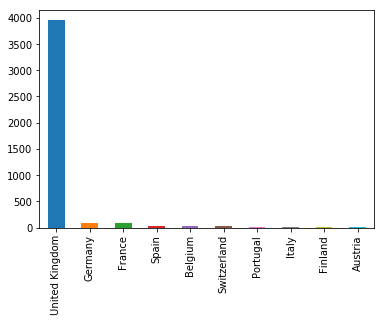

In [11]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')


In [12]:
uk_data=data[data.Country=='United Kingdom']

In [13]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
uk_data = uk_data[(uk_data['Quantity']>0)]# to filter out negative quantity
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [15]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Here, you can filter the necessary columns for RFM analysis. You only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice. 

CustomerId will uniquely define your customers, InvoiceDate help you calculate recency of purchase, 

InvoiceNo helps you to count the number of time transaction performed(frequency). 

Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help you to calculate the total purchased amount.

In [16]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [20]:
uk_data.shape

(354345, 5)

In [19]:
len(uk_data.CustomerID.unique())

3921

In [21]:
len(uk_data.InvoiceNo.unique())

16649

In [22]:
# Monetary
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [23]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [25]:
PRESENT = dt.datetime(2019,6,23)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [26]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


RFM Analysis

Here, you are going to perform following opertaions:

    For Recency, Calculate the number of days between present date and date of last purchase each customer.
    For Frequency, Calculate the number of orders for each customer.
    For Monetary, Calculate sum of purchase price for each customer.


In [27]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})


In [28]:
rfm.columns=['monetary','frequency','recency']

In [29]:
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,3077,1,77183
12747.0,2754,103,4196
12748.0,2752,4596,33719
12749.0,2755,199,4090
12820.0,2755,59,942


In [30]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [31]:
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,3077,1,77183,4,4,1
12747.0,2754,103,4196,4,1,4
12748.0,2752,4596,33719,4,1,4
12749.0,2755,199,4090,4,1,4
12820.0,2755,59,942,3,2,4


In [32]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,3077,1,77183,4,4,1,441
12747.0,2754,103,4196,4,1,4,414
12748.0,2752,4596,33719,4,1,4,414
12749.0,2755,199,4090,4,1,4,414
12820.0,2755,59,942,3,2,4,324


In [37]:
rfm['RFM_Score'].value_counts()

414    409
141    345
413    186
231    178
142    169
323    156
322    142
232    140
324    124
143    112
233    107
241    102
131     92
412     92
313     83
314     81
242     78
424     78
332     77
234     65
223     63
144     59
321     58
423     53
133     52
422     51
333     49
221     49
222     48
132     43
      ... 
312     39
224     39
331     35
121     34
243     33
342     27
123     25
341     23
134     22
244     21
122     21
411     20
311     19
434     18
213     18
214     16
432     16
343     14
442     14
124     13
344     13
212     12
433     11
421      8
441      8
443      7
444      5
431      4
211      4
114      1
Name: RFM_Score, Length: 61, dtype: int64

In [36]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='114'].sort_values('monetary', ascending=False).head()


,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
17254.0,2756,112,272,1,1,4,114
